In [ ]:
#!pip install fake-useragent
#!pip install --upgrade kaleido

   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/65.9 MB 1.5 MB/s eta 0:00:43
   ---------------------------------------- 0.8/65.9 MB 1.5 MB/s eta 0:00:45
    --------------------------------------- 1.0/65.9 MB 1.5 MB/s eta 0:00:43
    --------------------------------------- 1.6/65.9 MB 1.7 MB/s eta 0:00:38
   - -------------------------------------- 1.8/65.9 MB 1.7 MB/s eta 0:00:37
   - -------------------------------------- 2.4/65.9 MB 1.8 MB/s eta 0:00:36
   - -------------------------------------- 2.9/65.9 MB 1.9 MB/s eta 0:00:34
   -- ------------------------------------- 3.4/65.9 MB 2.0 MB/s eta 0:00:32
   -- ------------------------------------- 3.9/65.9 MB 2.1 MB/s eta 0:00:30
   -- ------------------------------------- 4.7/65.9 MB 2.2 MB/s eta 0:00:28
   --- ------------------------------------ 5.5/65.9 MB 2.3 MB/s eta 0:00:26
   --- ------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## DATA SCIENTIST




### 1. Obtención de datos mediante url

Una de las opciones para la obtención de datos a traves de internet es hacer peticiones directamente a los repositorios
que alojan los datos. En este caso, vamos a obtener los datos de la elección europea de 2009, 2014 y 2019 en la Comunidad de valencia a través de [la plataforma centralizadora del gobierno](https://datos.gob.es/es/catalogo?q=elecciones+europeas&sort=score+desc%2C+metadata_created+desc). Hacemos uso de la librería requests para realizar las peticiones y la librería pandas para manipular los datos obtenidos. Obviamente esta es una de las distintas maneras que dispone un Data Scientist de obtener los datos de la web. En la próxima sección mostraremos como obtenerlas a partir de una base de datos que hemos creado previamente siguiendo el proceso de un Data Engineer.

In [1]:
# DATA from API's
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from bs4 import BeautifulSoup as bs
import zipfile
import scipy.stats as stats
#from scipy import stats
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Esto es para indicar al dominio web que estamos haciendo la peticion desde una dirección fiable.
from fake_useragent import UserAgent
ua = UserAgent()
headers = {'User-Agent': ua.random}

In [3]:
# Cargamos los datos desde el repositorio original:
# https://datos.gob.es/es/catalogo?q=elecciones+europeas&sort=score+desc,+metadata_created+desc
# Para ello, creamos un diccionario con las url de los datasets
# Y creamos un diccionario con los dataframes
anyos = ["2009","2014","2019"]
p_url = {"2009":"https://dadesobertes.gva.es/dataset/46630eb4-0457-421c-b4d2-64a80130143e/resource/a0a8e5b0-efe9-4a70-bcf3-6c1cfecc309c/download/resultados-elecciones-europeas-1-2009.csv",
         "2014":"https://dadesobertes.gva.es/dataset/7e333a8e-3119-4e7c-9cc3-c4b3d239dbbb/resource/3d6e04ad-3c03-4f99-9959-64a35f34daf4/download/resultados-elecciones-europeas-1-2014.csv",
         "2019":"https://dadesobertes.gva.es/dataset/3dc860d0-4427-4cc4-a616-8d71c1f6c106/resource/0581a6fe-88bb-4770-8f5d-46194d21a586/download/resultados-elecciones-europeas-1-2019.csv"
         }

df_ElecUE ={}

for anyo in anyos:
  url = p_url[anyo]
  df_ElecUE[anyo] = pd.read_csv(url,sep=";")
  


In [4]:
# Mostramos los primeros 5 registros de nuestros dataframes, los cuales corresponden a cada elemento dentro del diccionario 
# df_ElecUE, y que está compuesto por un dataframe para cada año, 2009, 2014, y 2015 respectivamente. 
df_ElecUE["2009"].head(5)


,ANYO,NUM_ELEC,COD_PROV,PROVINCIA,COD_COMARCA,COMARCA,COD_MUNICIPIO,MUNICIPIO,DISTRITO,SECCION,...,CENSO,VOTANTES,VALIDOS,BLANCOS,ABSTENCIONES,NULOS,CANDIDATO_COD,CANDIDATO_SIGLAS,CANDIDATO_DESC,VOTOS
0,2009,1,3,Alicante,30,La Marina Alta,3001,"Atzúbia, l'",1,1,...,392,262,262,1,130,0,14,RC,Partit Republicà Català,0
1,2009,1,3,Alicante,30,La Marina Alta,3001,"Atzúbia, l'",1,1,...,392,262,262,1,130,0,15,PCPE,Partido Comunista de los Pueblos de España,1
2,2009,1,3,Alicante,30,La Marina Alta,3001,"Atzúbia, l'",1,1,...,392,262,262,1,130,0,17,UPyD,Unión Progreso y Democracia,1
3,2009,1,3,Alicante,30,La Marina Alta,3001,"Atzúbia, l'",1,1,...,392,262,262,1,130,0,18,AES,Alternativa Española,0
4,2009,1,3,Alicante,30,La Marina Alta,3001,"Atzúbia, l'",1,1,...,392,262,262,1,130,0,19,FA,Falange Auténtica,0


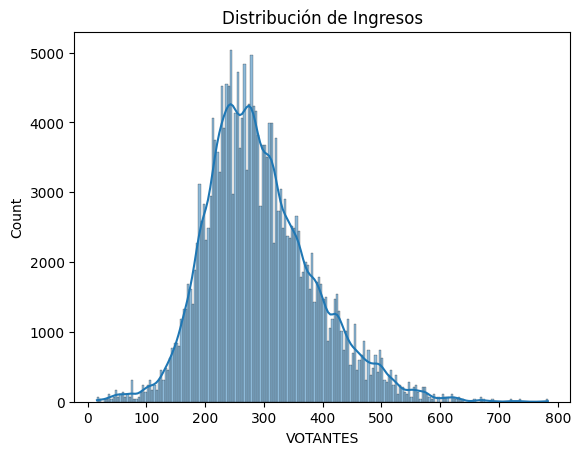

In [5]:
# Hacemos un gráfico de la distribución de los datos de las elecciones por año
sns.histplot(df_ElecUE["2009"]["VOTANTES"], kde=True)
plt.title('Distribución de Ingresos')
plt.savefig("graficos/votantes_2009.png", dpi=300, bbox_inches='tight') #PARA GUARDAR EL GRÁFICO COMO IMAGEN
plt.show()

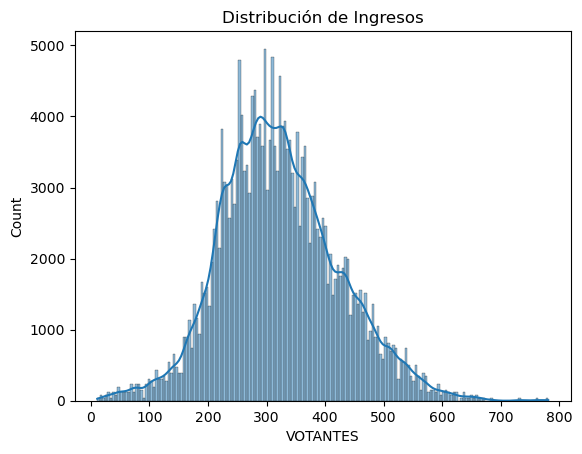

In [7]:
sns.histplot(df_ElecUE["2014"]["VOTANTES"], kde=True)
plt.title('Distribución de Ingresos')
plt.show()

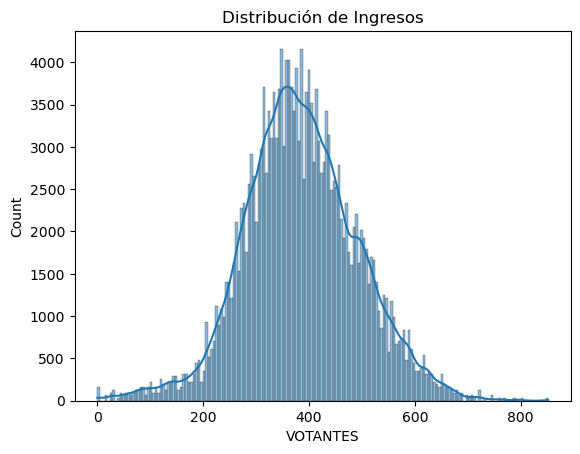

In [8]:
sns.histplot(df_ElecUE["2019"]["VOTANTES"], kde=True)
plt.title('Distribución de Ingresos')
plt.show()

In [6]:
# Ahora bien, necesitamos analizar los datos en conjunto, es decir, intentaremos hacer una análisis comparativo 
# entre los años de las elecciones y mostrar la evolución de los votantes y los partidos.
# Para ello, vamos a integrar los tres dataframe en uno solo, al que llamaremos df_final. 
df_final = pd.DataFrame()
for anyo in anyos:
    #df_final = pd.concat([df_ElecUE[2009], df_ElecUE[2014], df_ElecUE[2019]], ignore_index=True)
    df_final = pd.concat([df_final,df_ElecUE[anyo]], ignore_index=True)

# Guardamos el resultado en un nuevo CSV
df_final.to_csv("datos_combinados.csv", index=False)

# Verificar que la unión se hizo correctamente
print(df_final.head())
print(f"Total de filas combinadas: {df_final.shape[0]}")


   ANYO  NUM_ELEC  COD_PROV PROVINCIA  COD_COMARCA         COMARCA  \
0  2009         1         3  Alicante           30  La Marina Alta   
1  2009         1         3  Alicante           30  La Marina Alta   
2  2009         1         3  Alicante           30  La Marina Alta   
3  2009         1         3  Alicante           30  La Marina Alta   
4  2009         1         3  Alicante           30  La Marina Alta   

   COD_MUNICIPIO    MUNICIPIO  DISTRITO  SECCION  ... CENSO  VOTANTES  \
0           3001  Atzúbia, l'         1        1  ...   392       262   
1           3001  Atzúbia, l'         1        1  ...   392       262   
2           3001  Atzúbia, l'         1        1  ...   392       262   
3           3001  Atzúbia, l'         1        1  ...   392       262   
4           3001  Atzúbia, l'         1        1  ...   392       262   

   VALIDOS  BLANCOS  ABSTENCIONES  NULOS  CANDIDATO_COD  CANDIDATO_SIGLAS  \
0      262        1           130      0             14        

In [7]:
# Cambiamos el tipo de dato de la columna ANYO a entero
df_final["Año"] = df_final["ANYO"].astype(int)

# Revisar estructura de los datos
print(df_final.info())

# Revisar valores nulos
print(df_final.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635890 entries, 0 to 635889
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ANYO              635890 non-null  int64 
 1   NUM_ELEC          635890 non-null  int64 
 2   COD_PROV          635890 non-null  int64 
 3   PROVINCIA         635890 non-null  object
 4   COD_COMARCA       635890 non-null  int64 
 5   COMARCA           635890 non-null  object
 6   COD_MUNICIPIO     635890 non-null  int64 
 7   MUNICIPIO         635890 non-null  object
 8   DISTRITO          635890 non-null  int64 
 9   SECCION           635890 non-null  int64 
 10  MESA              635890 non-null  object
 11  CANDIDATURAS      635890 non-null  int64 
 12  CENSO             635890 non-null  int64 
 13  VOTANTES          635890 non-null  int64 
 14  VALIDOS           635890 non-null  int64 
 15  BLANCOS           635890 non-null  int64 
 16  ABSTENCIONES      635890 non-null  int

In [9]:
# Realizamos el test KS comparando con la distribución normal ('norm')
#filtramos los datos para el año 2009
data = df_final["VOTANTES"]
ks_stat, p_value = stats.kstest(data, 'norm')
print("Estadístico KS:", ks_stat)
print("p-valor:", p_value)

if p_value < 0.05:
    print("Los datos no se distribuyen como una normal")
else:
    print("Los datos se distribuyen como una normal")

Estadístico KS: 0.9997483841544921
p-valor: 0.0
Los datos no se distribuyen como una normal


Una ves revisados los datos, podemos ver que no hay datos nulos, lo cual es una buena noticia.

In [10]:
import plotly.graph_objects as go

In [11]:
# Crear una tabla pivotada para ver los totales de votos, abstención, nulos y blancos por año
stats_pivot = df_final.pivot_table(index="Año", values=["CENSO","VOTANTES", "VALIDOS", "ABSTENCIONES", "NULOS", "BLANCOS"], aggfunc="sum")

# Calcular porcentajes sobre el total de votos
stats_pivot["% Votantes"] = ((stats_pivot["VOTANTES"] / stats_pivot["CENSO"]) * 100).round(2)
stats_pivot["% Votos Validos"] = ((stats_pivot["VALIDOS"] / stats_pivot["CENSO"]) * 100).round(2)

stats_pivot["% Abstenciones"] = ((stats_pivot["ABSTENCIONES"] / stats_pivot["CENSO"]) * 100).round(2)

stats_pivot["% Votos Nulos"] = ((stats_pivot["NULOS"] / stats_pivot["CENSO"]) * 100).round(2)

stats_pivot["% Votos Blanco"] = ((stats_pivot["BLANCOS"] / stats_pivot["CENSO"]) * 100).round(2)


# Mostrar tabla con porcentajes
print(stats_pivot)


      ABSTENCIONES  BLANCOS      CENSO    NULOS   VALIDOS  VOTANTES  \
Año                                                                   
2009      57651265   714420  123767665   436695  65679705  66116400   
2014      69841980  1404390  139891596  1721733  68327883  70049616   
2019      41428128   580800  115982432   567552  73986752  74554304   

      % Votantes  % Votos Validos  % Abstenciones  % Votos Nulos  \
Año                                                                
2009       53.42            53.07           46.58           0.35   
2014       50.07            48.84           49.93           1.23   
2019       64.28            63.79           35.72           0.49   

      % Votos Blanco  
Año                   
2009            0.58  
2014            1.00  
2019            0.50  


In [17]:
# Resetear índice para que el año sea columna y no índice
stats_pivot = stats_pivot.reset_index()

# Gráfico de barras usando la versión pivotada
fig1 = px.bar(stats_pivot, x="Año", y=["VOTANTES", "VALIDOS", "ABSTENCIONES", "NULOS", "BLANCOS"],
              barmode='group',
              title="Figura 1. Totales de votos y abstención en 2009, 2014 y 2019",
              labels={"value": "Cantidad", "variable": "Tipo de voto"})

fig1.show()

In [ ]:
#stats_provincia_pivot = df_final.pivot_table(index=["PROVINCIA", "Año"], values=["CENSO","VOTANTES", "VALIDOS", "ABSTENCIONES","NULOS" ,"BLANCOS"], aggfunc="sum").reset_index()

# Crear tabla pivotada por provincia y año
stats_provincia_pivot = df_final.pivot_table(index=["Año", "PROVINCIA"], values=["CENSO","VOTANTES","VALIDOS" ,"ABSTENCIONES", "NULOS", "BLANCOS"], aggfunc="sum").reset_index()

# Calcular porcentajes
stats_provincia_pivot["% Votantes"] = ((stats_provincia_pivot["VOTANTES"] / stats_provincia_pivot["CENSO"]) * 100).round(2)
stats_provincia_pivot["% Votos Validos"] = ((stats_provincia_pivot["VALIDOS"] / stats_provincia_pivot["CENSO"]) * 100).round(2)
stats_provincia_pivot["% Abstenciones"] = ((stats_provincia_pivot["ABSTENCIONES"] / stats_provincia_pivot["CENSO"]) * 100).round(2)
stats_provincia_pivot["% Votos Nulos"] = ((stats_provincia_pivot["NULOS"] / stats_provincia_pivot["CENSO"]) * 100).round(2)
stats_provincia_pivot["% Votos Blanco"] = ((stats_provincia_pivot["BLANCOS"] / stats_provincia_pivot["CENSO"]) * 100).round(2)

# Mostrar tabla con porcentajes
print(stats_provincia_pivot)



    Año  PROVINCIA  ABSTENCIONES  BLANCOS     CENSO   NULOS   VALIDOS  \
0  2009   Alicante      21460565   226765  43264935  138950  21665420   
1  2009  Castellón       6894195    98525  14576170   59500   7622475   
2  2009   Valencia      29296505   389130  65926560  238245  36391810   
3  2014   Alicante      26819325   443625  49394358  642564  21932469   
4  2014  Castellón       8175609   182988  16327272  281814   7869849   
5  2014   Valencia      34847046   777777  74169966  797355  38525565   
6  2019   Alicante      16390048   190752  41148672  204096  24554528   
7  2019  Castellón       4501248    87616  13412608   90272   8821088   
8  2019   Valencia      20536832   302432  61421152  273184  40611136   

   VOTANTES  % Votantes  % Votos Validos  % Abstenciones  % Votos Nulos  \
0  21804370       50.40            50.08           49.60           0.32   
1   7681975       52.70            52.29           47.30           0.41   
2  36630055       55.56            55.20    

In [22]:
# Gráfico de barras por provincia
fig2 = px.bar(stats_provincia_pivot, x="PROVINCIA", y=["VOTANTES", "VALIDOS", "ABSTENCIONES","NULOS","BLANCOS"],
              barmode='group',
              facet_row="Año", #facet_col="Año",
              title="Figura 1. Totales de votos, validos, nulos y abstención por provincia",
              labels={"value": "Cantidad", "variable": "Tipo de voto"},height=900)
#fig2.write_image("graficos/votos_totales_por_provincia.png")
fig2.show()


In [17]:
# Gráfico de líneas para mostrar tendencia
fig1 = px.line(stats_pivot, x="Año", y=["VOTANTES", "VALIDOS", "ABSTENCIONES", "NULOS", "BLANCOS"],
               title="Tendencia de votos y abstención por año",
               labels={"value": "Cantidad", "variable": "Tipo de voto"},
               markers=True)

fig1.show()


In [29]:
# Gráfico de líneas con facetas por provincia
fig2 = px.line(stats_provincia_pivot, x="Año", y=["VOTANTES", "VALIDOS", "ABSTENCIONES", "NULOS", "BLANCOS"],
               facet_col="PROVINCIA", title="Figura 2. Tendencia de votos y abstención por provincia",
               labels={"value": "Cantidad", "variable": "Tipo de voto"},
               markers=True)
fig2.write_image("graficos/tendencia_votos_por_provincia.png")
fig2.show()


In [19]:
# Gráfico de líneas con porcentajes en lugar de totales
fig = px.line(stats_pivot, x="Año", y=["% Votantes","% Votos Validos","% Abstenciones", "% Votos Nulos", "% Votos Blanco"],
               title="Tendencia de porcentajes de votos por año",
               labels={"value": "Porcentaje", "variable": "Tipo de voto"},
               markers=True)

fig.show()


In [20]:
px.line(stats_provincia_pivot, x="Año", y=["% Votantes","% Votos Validos","% Abstenciones", "% Votos Nulos", "% Votos Blanco"],
               facet_col="PROVINCIA", title="Tendencia de votos y abstención por provincia",
               labels={"value": "Cantidad", "variable": "Tipo de voto"},
               markers=True)

fig.show()

In [21]:
# Resumen de estadísticas claves:
# Hacemos una resumen de los votos, validos, abstenciones, nulos y blancos
stats = df_final.groupby("ANYO").agg({
    "VOTANTES": ["sum", "mean", "std"],
    "ABSTENCIONES": ["sum", "mean", "std"],
    "NULOS": ["sum"],
    "BLANCOS": ["sum"]
}).reset_index()

# Mostrar tabla estadística ( dos niveles)
#print(stats)
display(stats)
stats

df_final.groupby("ANYO").agg

ANYO  VOTANTES                         ABSTENCIONES              \
              sum        mean         std          sum        mean   
0  2009  66116400  293.420317   92.689799     57651265  255.852594   
1  2014  70049616  322.583333  101.282211     69841980  321.627155   
2  2019  74554304  385.476837  107.856491     41428128  214.200695   

                 NULOS  BLANCOS  
          std      sum      sum  
0   87.161420   436695   714420  
1  102.862376  1721733  1404390  
2   81.739547   567552   580800

<bound method DataFrameGroupBy.aggregate of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001F486DA8F80>>

In [27]:
stats_provincia_VOTOS = df_final.pivot_table(index=["Año", "PROVINCIA","CANDIDATO_DESC"], values=["CENSO","VOTOS"], aggfunc="sum").reset_index()

stats_provincia_VOTOS["% Votos"] = ((stats_provincia_VOTOS["VOTOS"] / stats_provincia_VOTOS["CENSO"]) * 100).round(2)

stats_provincia_VOTOS

,Año,PROVINCIA,CANDIDATO_DESC,CENSO,VOTOS,% Votos
0,2009,Alicante,Alternativa Española,1236141,612,0.05
1,2009,Alicante,Andecha Astur,1236141,79,0.01
2,2009,Alicante,Bloc Nacionalista Valencià-Coalició per Europa,1236141,3997,0.32
3,2009,Alicante,Centro Democrático Liberal,1236141,1086,0.09
4,2009,Alicante,Centro Democrático y Social,1236141,528,0.04
...,...,...,...,...,...,...
313,2019,Valencia,Recortes Cero-Los Verdes-Grupo Verde Europeo,1919411,2414,0.13
314,2019,Valencia,Solidaridad y Autogestión Internacionalista,1919411,177,0.01
315,2019,Valencia,Unidas Podemos cambiar Europa/Unides Podem can...,1919411,128058,6.67
316,2019,Valencia,VOX,1919411,92093,4.80


In [ ]:
stats_comarca_VOTOS = df_final.pivot_table(index=["Año", "COMARCA","CANDIDATO_DESC"], values=["CENSO","VOTOS"], aggfunc="sum").reset_index()

stats_comarca_VOTOS["% Votos"] = ((stats_provincia_VOTOS["VOTOS"] / stats_provincia_VOTOS["CENSO"]) * 100).round(2)

top10_por_año = df.groupby(["AÑO", "CANDIDATOS_SIGLAS"])["VOTOS"].sum().reset_index()



,Año,COMARCA,CANDIDATO_DESC,CENSO,VOTOS,% Votos
0,2009,El Alto Mijares,Alternativa Española,3756,1,0.05
1,2009,El Alto Mijares,Andecha Astur,3756,0,0.01
2,2009,El Alto Mijares,Bloc Nacionalista Valencià-Coalició per Europa,3756,7,0.32
3,2009,El Alto Mijares,Centro Democrático Liberal,3756,2,0.09
4,2009,El Alto Mijares,Centro Democrático y Social,3756,2,0.04
...,...,...,...,...,...,...
3599,2019,Valencia,Recortes Cero-Los Verdes-Grupo Verde Europeo,585389,855,NaN
3600,2019,Valencia,Solidaridad y Autogestión Internacionalista,585389,60,NaN
3601,2019,Valencia,Unidas Podemos cambiar Europa/Unides Podem can...,585389,42950,NaN
3602,2019,Valencia,VOX,585389,33095,NaN


In [31]:
fig2 = px.bar(stats_provincia_VOTOS, x="Año", color="CANDIDATO_DESC", y=["% Votos"],
              barmode='group',
              facet_row="PROVINCIA", #facet_col="PROVINCIA",
              title="Figura 1. Totales de votos, validos, nulos y abstención por provincia",
              labels={"value": "Cantidad", "variable": "Tipo de voto"},height=900)
#fig2.write_image("graficos/votos_totales_por_provincia.png")
fig2.show()



In [24]:
### 2. Obtención de datos mediante API
from fake_useragent import UserAgent
import json

# Identificador de la Generalitat Valenciana
gv_id = "A10002983"  # Puedes confirmar este identificador según los datos que extrajiste antes

ua = UserAgent()
headers = {'User-Agent': ua.random}

In [25]:
#url = "https://datos.gob.es/apidata/catalog/dataset/a10002983-resultados-de-elecciones-europeas?"
#/a10002983
#url = "https://datos.gob.es/apidata/catalog/publisher?_sort=notation&_pageSize=10&_page=1"
#url = f"https://datos.gob.es/apidata/catalog/dataset?_sort=title&_publisher={gv_id}"
url = "https://datos.gob.es/apidata/catalog/dataset?_sort=title&_pageSize=10"
url = "https://datos.gob.es/apidata/catalog/dataset?_sort=title&_pageSize=20"


ua = UserAgent()
headers = {'User-Agent': ua.random}
response = requests.get(url, headers=headers)


if response.status_code == 200:
    data = response.json()

    # Imprimir toda la estructura del JSON para inspección manual
    print("Estructura de la respuesta:")
    print(json.dumps(data, indent=2))

else:
    print("Error al obtener los datasets:", response.status_code)




Estructura de la respuesta:
{
  "format": "linked-data-api",
  "version": "0.2",
  "result": {
    "_about": "http://datos.gob.es/apidata/catalog/dataset.json?_pageSize=20&_sort=title",
    "definition": "http://datos.gob.es/apidata/catalog/meta/dataset.json?_sort=title",
    "extendedMetadataVersion": "http://datos.gob.es/apidata/catalog/dataset.json?_pageSize=20&_metadata=all&_sort=title",
    "first": "http://datos.gob.es/apidata/catalog/dataset.json?_page=0&_sort=title",
    "isPartOf": {
      "_about": "http://datos.gob.es/apidata/catalog/dataset.json?_sort=title",
      "definition": "http://datos.gob.es/apidata/catalog/meta/dataset.json?_sort=title",
      "hasPart": "http://datos.gob.es/apidata/catalog/dataset.json?_pageSize=20&_sort=title",
      "type": "http://purl.org/linked-data/api/vocab#ListEndpoint"
    },
    "items": [
      {
        "_about": "https://datos.gob.es/catalogo/l01431482-actividades",
        "accrualPeriodicity": {
          "_about": "https://datos.go

In [26]:
if response.status_code == 200:
    data = response.json()

    # Filtrar los resultados para encontrar la Generalitat Valenciana
    gv_publisher = [item for item in data["result"]["items"] if "Generalitat Valenciana" in item["prefLabel"]]

    if gv_publisher:
        print("Publicador encontrado:")
        print(gv_publisher)
    else:
        print("No se encontraron resultados para la Generalitat Valenciana.")
else:
    print("Error al obtener los datos:", response.status_code)


KeyError: 'prefLabel'

In [ ]:
if response.status_code == 200:
    data = response.json()
    
    # Filtrar los resultados para encontrar la Generalitat Valenciana
    gv_publisher = [item for item in data["result"]["items"] if "Generalitat Valenciana" in item["prefLabel"]]

    if gv_publisher:
        # Obtener el identificador de la Generalitat Valenciana
        gv_id = gv_publisher[0]["notation"]
        print("Identificador de la Generalitat Valenciana:", gv_id)

        # Construir la URL para consultar los datasets de la Generalitat Valenciana
        datasets_url = f"https://datos.gob.es/apidata/catalog/dataset?_sort=title&_publisher={gv_id}"

        # Obtener los datasets
        datasets_response = requests.get(datasets_url)

        if datasets_response.status_code == 200:
            datasets_data = datasets_response.json()
            print("Datasets disponibles:")
            
            for item in datasets_data["result"]["items"]:
                print(f"Título: {item.get('title', 'No disponible')}")
                print(f"Enlace al dataset: {item['_about']}\n")
        else:
            print("Error al obtener los datasets:", datasets_response.status_code)
    else:
        print("No se encontraron resultados para la Generalitat Valenciana.")
else:
    print("Error al obtener los datos:", response.status_code)

KeyError: 'prefLabel'

### 3. Obtención de datos mediante SQLALCHEMY

In [ ]:
import sqlite3
from sqlalchemy import create_engine


In [ ]:
elecciones_df = pd.read_sql_table("AÑOS", con=engine)
elecciones_df

,AÑOSID,AÑO
0,1,2019
1,2,2014
2,3,2009


In [ ]:
!pip install -U kaleido